<a href="https://colab.research.google.com/github/Kabir26-star/Final-Project/blob/main/Final%20Project%20CAS%20ADS/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 03. Slow Moving Part Data 2.csv to 03. Slow Moving Part Data 2.csv


In [ ]:
#Reading and opening a file
df = pd.read_csv("03. Slow Moving Part Data 2.csv", encoding='latin-1')
df

,Year,Site Name (Id),Technical CLUSTER,ABC Indicator,Material - Text,Material Type,Material Status,Material - Key,Supplier 1,Supplier 1 names,...,Slow Move Rate,Slow Move B+C,Slow Move Part,Reorder Point,Out of Stock,Withdraw Quantity,Stock Quantity,BOM Quantity,Stock 0,Unnamed: 29
0,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Bearing Cannister Assy CA109068/PA415750,ERSA,Z3-Active,104646407.0,100096062.0,GEA Nu-Con Pty Limited,...,-,-,-,20,-,11,52,3,4,NaN
1,2025.0,MY PL NMM-Sri Muda (9536),Malaysia & Singapore,A,C Valve Cone Seat Tetra 6-4722 1274 08,ERSA,Z3-Active,103479765.0,100005559.0,Tetra Pak (Malaysia) Sdn Bhd,...,NaN,NaN,-,20,-,43,62,1,3,NaN
2,2025.0,MY PL NMM-Chembong (9453),Malaysia & Singapore,A,Sieve Sweco Support Screen 72 72005M017,ERSA,Z3-Active,100780627.0,100006515.0,Arachem (M) Sdn Bhd,...,NaN,NaN,1,12,-,8,15,3,5,NaN
3,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,#,Screen Sifter PH15-0190-51199-6958,ERSA,Z4-Under Discontinuation,103467603.0,100008829.0,VIBRA MASCHINENFABRIK Schultheis,...,NaN,NaN,-,-,-,287,27,41,-,NaN
4,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,Z,Assembly Computer SMITHS 71150057,ERSA,Z3-Active,102268896.0,100876199.0,Mettler Toledo Eagle,...,NaN,NaN,25,-,-,7,6,23,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,B,Tube Silverpress Nipples 850mmE54 TopLid,ERSA,Z3-Active,105654302.0,100007656.0,Compair GmbH,...,-,-,-,4,-,1,2,-,1,NaN
149997,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Cylinder DSBC-32-100-PPVA-N3 Festo,ERSA,Z3-Active,106011787.0,100131928.0,Festo (Pty) Ltd,...,-,-,-,4,-,-,4,1,1,NaN
149998,2025.0,IN PL Ponda (0454),South Asia,B,Belt 3500 x 140 x 1.3mm Blue CHIORINO,ERSA,Z3-Active,105756773.0,101011389.0,Franstek Belts Private Limited,...,-,-,-,4,-,1,3,-,1,NaN
149999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Preprocessing and Cleaning Data**

In [ ]:
# Cleaning the Data and filling it up with values

df['Year'].fillna(2025, inplace = True)
df['Site Name (Id)'].fillna('PH PL Cagayan de Oro Factory (0190)', inplace = True)
df['Technical CLUSTER'].fillna('Phillippines', inplace = True)
df['ABC Indicator'].fillna('B', inplace = True)
df['Material - Text'].fillna('Tube Silverpress Nipples 850mmE54 TopLid', inplace = True)


df

/tmp/ipython-input-1862660462.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year'].fillna(2025, inplace = True)
/tmp/ipython-input-1862660462.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

,Year,Site Name (Id),Technical CLUSTER,ABC Indicator,Material - Text,Material Type,Material Status,Material - Key,Supplier 1,Supplier 1 names,...,Slow Move Rate,Slow Move B+C,Slow Move Part,Reorder Point,Out of Stock,Withdraw Quantity,Stock Quantity,BOM Quantity,Stock 0,Unnamed: 29
0,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Bearing Cannister Assy CA109068/PA415750,ERSA,Z3-Active,104646407.0,100096062.0,GEA Nu-Con Pty Limited,...,-,-,-,20,-,11,52,3,4,NaN
1,2025.0,MY PL NMM-Sri Muda (9536),Malaysia & Singapore,A,C Valve Cone Seat Tetra 6-4722 1274 08,ERSA,Z3-Active,103479765.0,100005559.0,Tetra Pak (Malaysia) Sdn Bhd,...,NaN,NaN,-,20,-,43,62,1,3,NaN
2,2025.0,MY PL NMM-Chembong (9453),Malaysia & Singapore,A,Sieve Sweco Support Screen 72 72005M017,ERSA,Z3-Active,100780627.0,100006515.0,Arachem (M) Sdn Bhd,...,NaN,NaN,1,12,-,8,15,3,5,NaN
3,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,#,Screen Sifter PH15-0190-51199-6958,ERSA,Z4-Under Discontinuation,103467603.0,100008829.0,VIBRA MASCHINENFABRIK Schultheis,...,NaN,NaN,-,-,-,287,27,41,-,NaN
4,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,Z,Assembly Computer SMITHS 71150057,ERSA,Z3-Active,102268896.0,100876199.0,Mettler Toledo Eagle,...,NaN,NaN,25,-,-,7,6,23,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,2025.0,PH PL Cagayan de Oro Factory (0190),Philippines,B,Tube Silverpress Nipples 850mmE54 TopLid,ERSA,Z3-Active,105654302.0,100007656.0,Compair GmbH,...,-,-,-,4,-,1,2,-,1,NaN
149997,2025.0,ZA PL Harrismith (0179),Eastern&South Africa Region ESAR,B,Cylinder DSBC-32-100-PPVA-N3 Festo,ERSA,Z3-Active,106011787.0,100131928.0,Festo (Pty) Ltd,...,-,-,-,4,-,-,4,1,1,NaN
149998,2025.0,IN PL Ponda (0454),South Asia,B,Belt 3500 x 140 x 1.3mm Blue CHIORINO,ERSA,Z3-Active,105756773.0,101011389.0,Franstek Belts Private Limited,...,-,-,-,4,-,1,3,-,1,NaN
149999,2025.0,PH PL Cagayan de Oro Factory (0190),Phillippines,B,Tube Silverpress Nipples 850mmE54 TopLid,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Inventory & Stock Analysis**



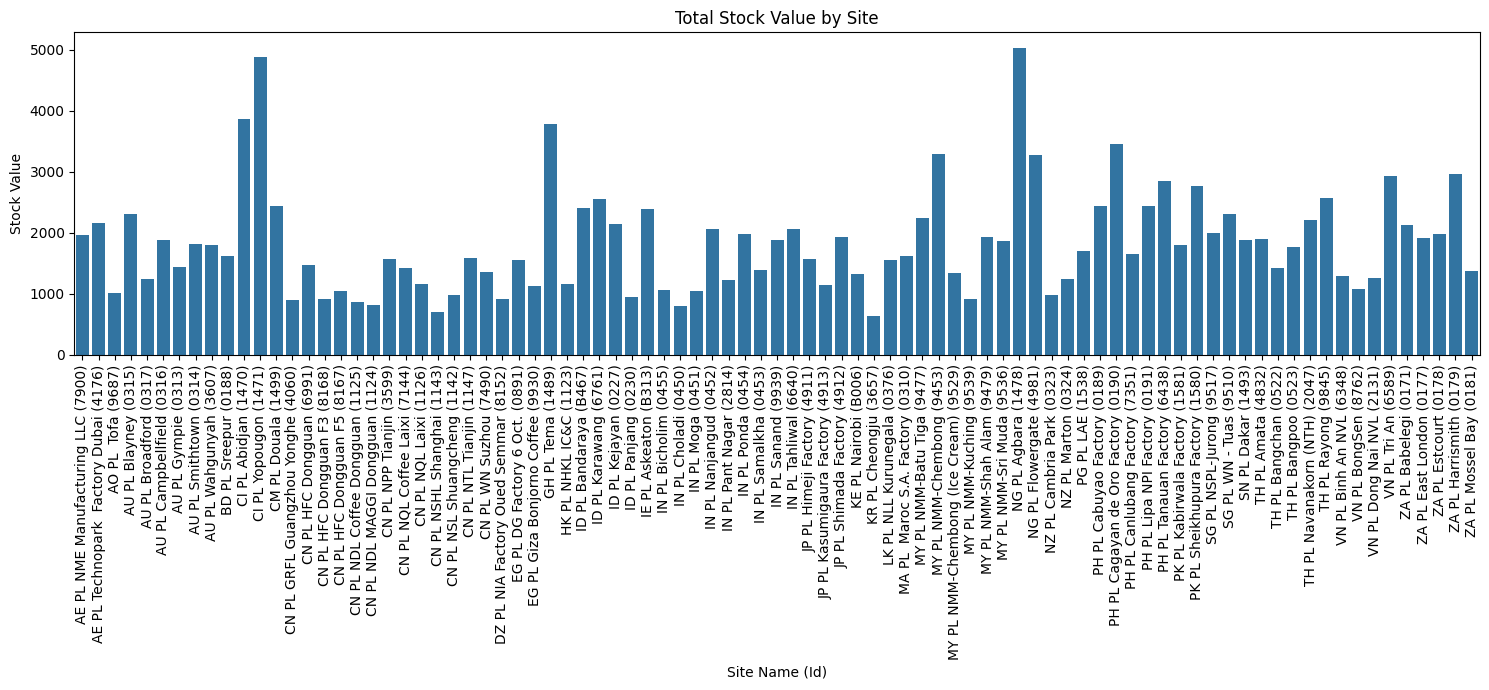

In [ ]:
#Grouping the Site Name and Finding the sum of the Stock Quantity
site_stock_value = df[df['Site Name (Id)'] != 1].groupby('Site Name (Id)')['Stock Value'].value_counts().reset_index()

# Create the bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x='Site Name (Id)', y='Stock Value', data=site_stock_value, errorbar=None)
plt.title("Total Stock Value by Site")
plt.xlabel("Site Name (Id)")
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

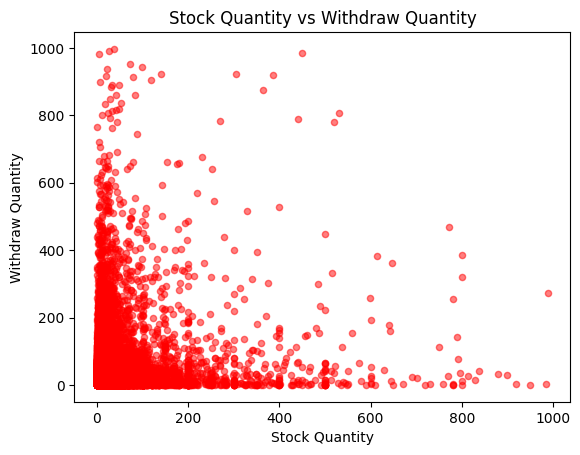

In [ ]:
# Creating a scatter plot to visualize the relationship between the Stock Quantity and Withdraw Quantity
df.plot(x='Stock Quantity', y='Withdraw Quantity', kind='scatter', color='red', alpha=0.5)
plt.title("Stock Quantity vs Withdraw Quantity")
plt.xlabel("Stock Quantity")
plt.ylabel("Withdraw Quantity")
plt.show()

**Movement and Utilization**

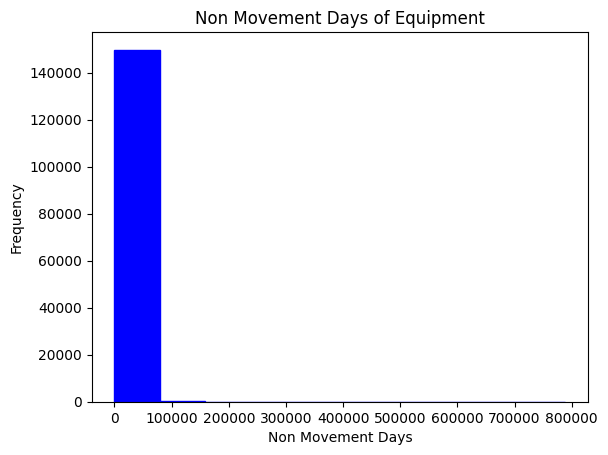

In [ ]:
#Visualizing the Non-Movement Days of Equipment in the form of a Histogram
df[' Non Move Days '].plot(kind = 'hist', fill = True, histtype = 'step', color = 'blue')
plt.title("Non Movement Days of Equipment")
plt.xlabel("Non Movement Days")
plt.ylabel("Frequency")
plt.show()

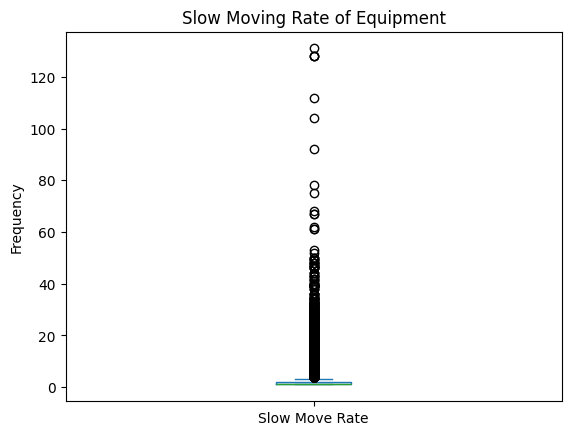

In [ ]:
#Visualizing the Slow Moving Rate of Equipment
df['Slow Move Rate'].plot.box()
plt.title("Slow Moving Rate of Equipment")
plt.ylabel("Frequency")
plt.show()

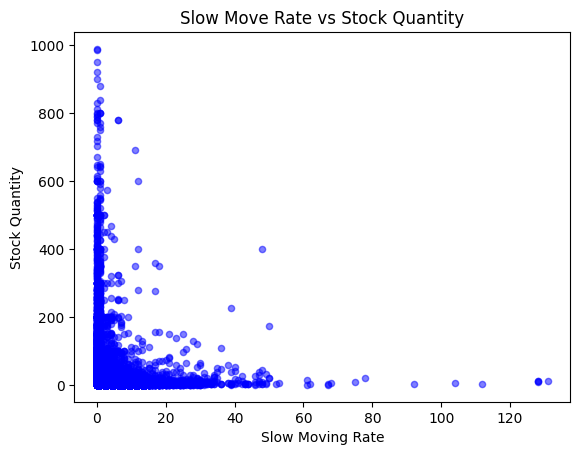

In [ ]:
# Visualizing the relationship between Slow Move Rate vs Stock Quantity
df.plot(x = 'Slow Move Rate', y = 'Stock Quantity', kind = 'scatter', color = 'blue', alpha = 0.5)
plt.title("Slow Move Rate vs Stock Quantity")
plt.xlabel("Slow Moving Rate")
plt.ylabel("Stock Quantity")
plt.show()

**Categorical & ABC Analysis**

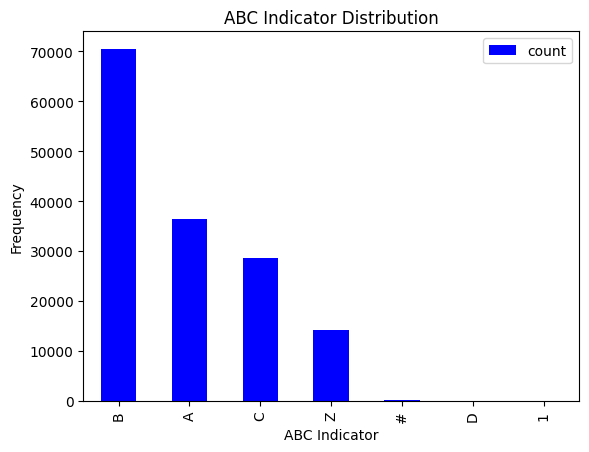

In [ ]:
df['ABC Indicator'].value_counts().plot(kind='bar', color='blue')
plt.title("ABC Indicator Distribution")
plt.xlabel("ABC Indicator")
plt.ylabel("Frequency")
plt.legend()
plt.show()

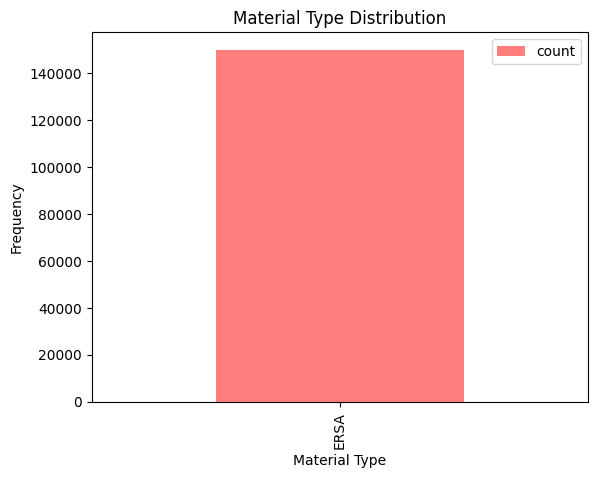

In [ ]:
df[df['Material Type'] != 1]['Material Type'].value_counts().plot(kind = 'bar', color = 'red', alpha = 0.5)
plt.title("Material Type Distribution")
plt.xlabel("Material Type")
plt.ylabel("Frequency")
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

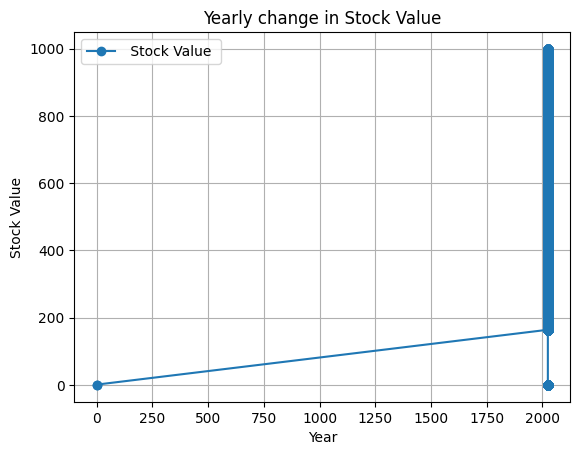

In [ ]:
plt.figure(figsize = (10,5)) # Adjusting the length of the graph

# Plot the yearly change in Stock Value
df.plot(x='Year', y=' Stock Value ', kind='line', marker='o')

# Customize the plot
plt.xlabel('Year')
plt.ylabel('Stock Value')
plt.title('Yearly change in Stock Value')
plt.grid(True)

# Display the plot
plt.show()

**Linear Regression for Stock Quantity**

In [ ]:
# Define features (X) and target (Y) after cleaning and encoding
X = df.drop(['Year', 'Site Name (Id)', 'Technical CLUSTER', 'ABC Indicator', 'Material - Text', 'Material Type', 'Material Status', 'Material - Key', 'Supplier 1', 'Supplier 1 names', 'Supplier 2', 'Supplier 2 names', 'Unnamed: 13', 'Slow Move Rate', 'Slow Move B+C', 'Slow Move Part', 'Reorder Point', 'Out of Stock', 'Withdraw Quantity', 'Stock Quantity', 'BOM Quantity', 'Stock 0', 'Unnamed: 29'], axis=1)
Y = df['Stock Quantity']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 83492.74136003791
Root Mean Squared Error (RMSE): 288.951105483329
Mean Absolute Error (MAE): 57.34751318910068
R-squared (R2): -31.339296373382098


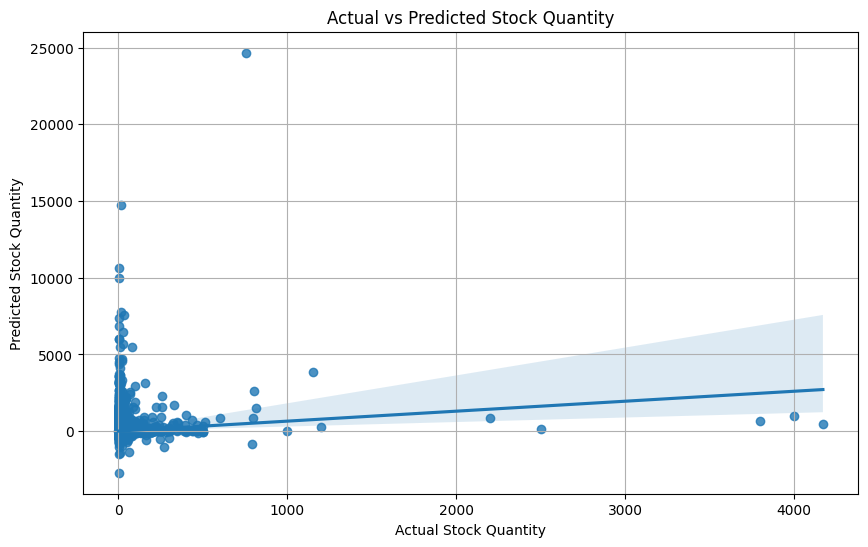

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Stock Quantity")
plt.xlabel("Actual Stock Quantity")
plt.ylabel("Predicted Stock Quantity")
plt.grid(True)
plt.show()

**Linear Regression for Withdraw Quantity**

In [ ]:
# Define features (X) and target (Y) after cleaning and encoding
X = df.drop(['Year', 'Site Name (Id)', 'Technical CLUSTER', 'ABC Indicator', 'Material - Text', 'Material Type', 'Material Status', 'Material - Key', 'Supplier 1', 'Supplier 1 names', 'Supplier 2', 'Supplier 2 names', 'Unnamed: 13', 'Slow Move Rate', 'Slow Move B+C', 'Slow Move Part', 'Reorder Point', 'Out of Stock', 'Stock Quantity', 'BOM Quantity', 'Stock 0', 'Unnamed: 29'], axis=1)
Y = df['Withdraw Quantity']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.504591346479195e-27
Root Mean Squared Error (RMSE): 3.878906220159486e-14
Mean Absolute Error (MAE): 1.6488926820048674e-14
R-squared (R2): 1.0


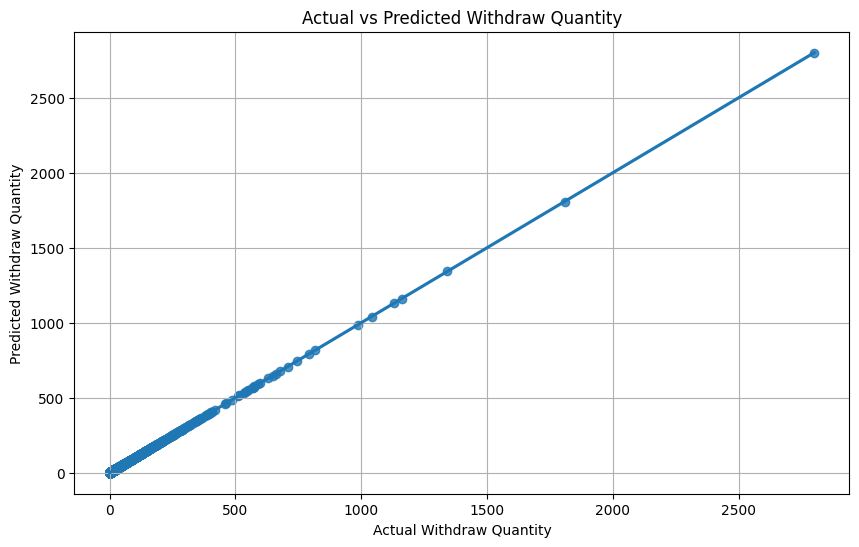

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Withdraw Quantity")
plt.xlabel("Actual Withdraw Quantity")
plt.ylabel("Predicted Withdraw Quantity")
plt.grid(True)
plt.show()

**Linear Regression for Reorder Point**

In [ ]:
# Define features (X) and target (Y) after cleaning and encoding
X = df.drop(['Year', 'Site Name (Id)', 'Technical CLUSTER', 'ABC Indicator', 'Material - Text', 'Material Type', 'Material Status', 'Material - Key', 'Supplier 1', 'Supplier 1 names', 'Supplier 2', 'Supplier 2 names', 'Unnamed: 13', 'Slow Move Rate', 'Slow Move B+C', 'Slow Move Part', 'Out of Stock', 'Stock Quantity', 'BOM Quantity', 'Stock 0', 'Unnamed: 29'], axis=1)
Y = df['Reorder Point']

In [ ]:
X_train, x_test, Y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [ ]:
Scaler = StandardScaler()
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.transform(x_test)

In [ ]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse) # Calculate RMSE manually
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.0575518171585366e-24
Root Mean Squared Error (RMSE): 1.0283733841161666e-12
Mean Absolute Error (MAE): 7.449518708201109e-13
R-squared (R2): 1.0


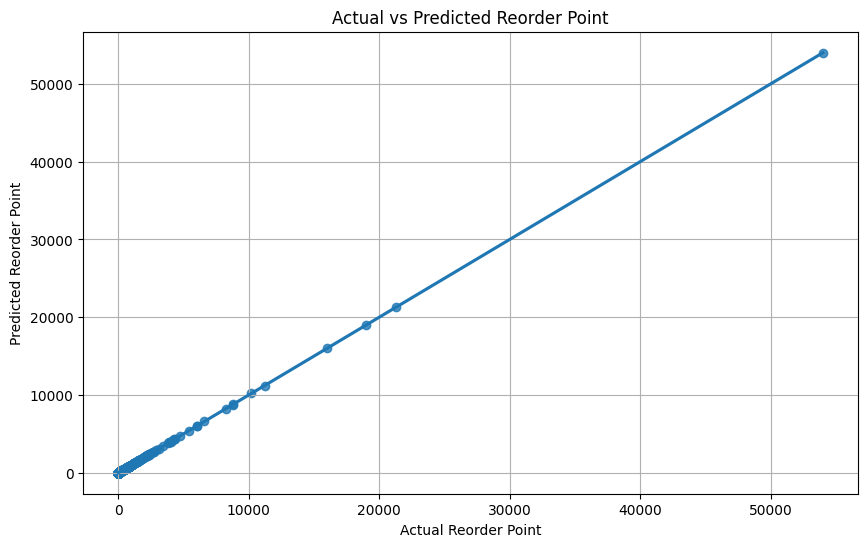

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=y_test, y=y_pred)
plt.title("Actual vs Predicted Reorder Point")
plt.xlabel("Actual Reorder Point")
plt.ylabel("Predicted Reorder Point")
plt.grid(True)
plt.show()